In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0934200801_PN11grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.111e-03 +/- 8.510e-04 (58.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.135e+04 sec
 Using fit statistic: chi
 Using Background File                0934200801_PN11spec_bkg.fits
  Background Exposure Time: 1.135e+04 sec
 Using Response (RMF) File            0934200801_PN11spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0934200801_PN11spec.arf



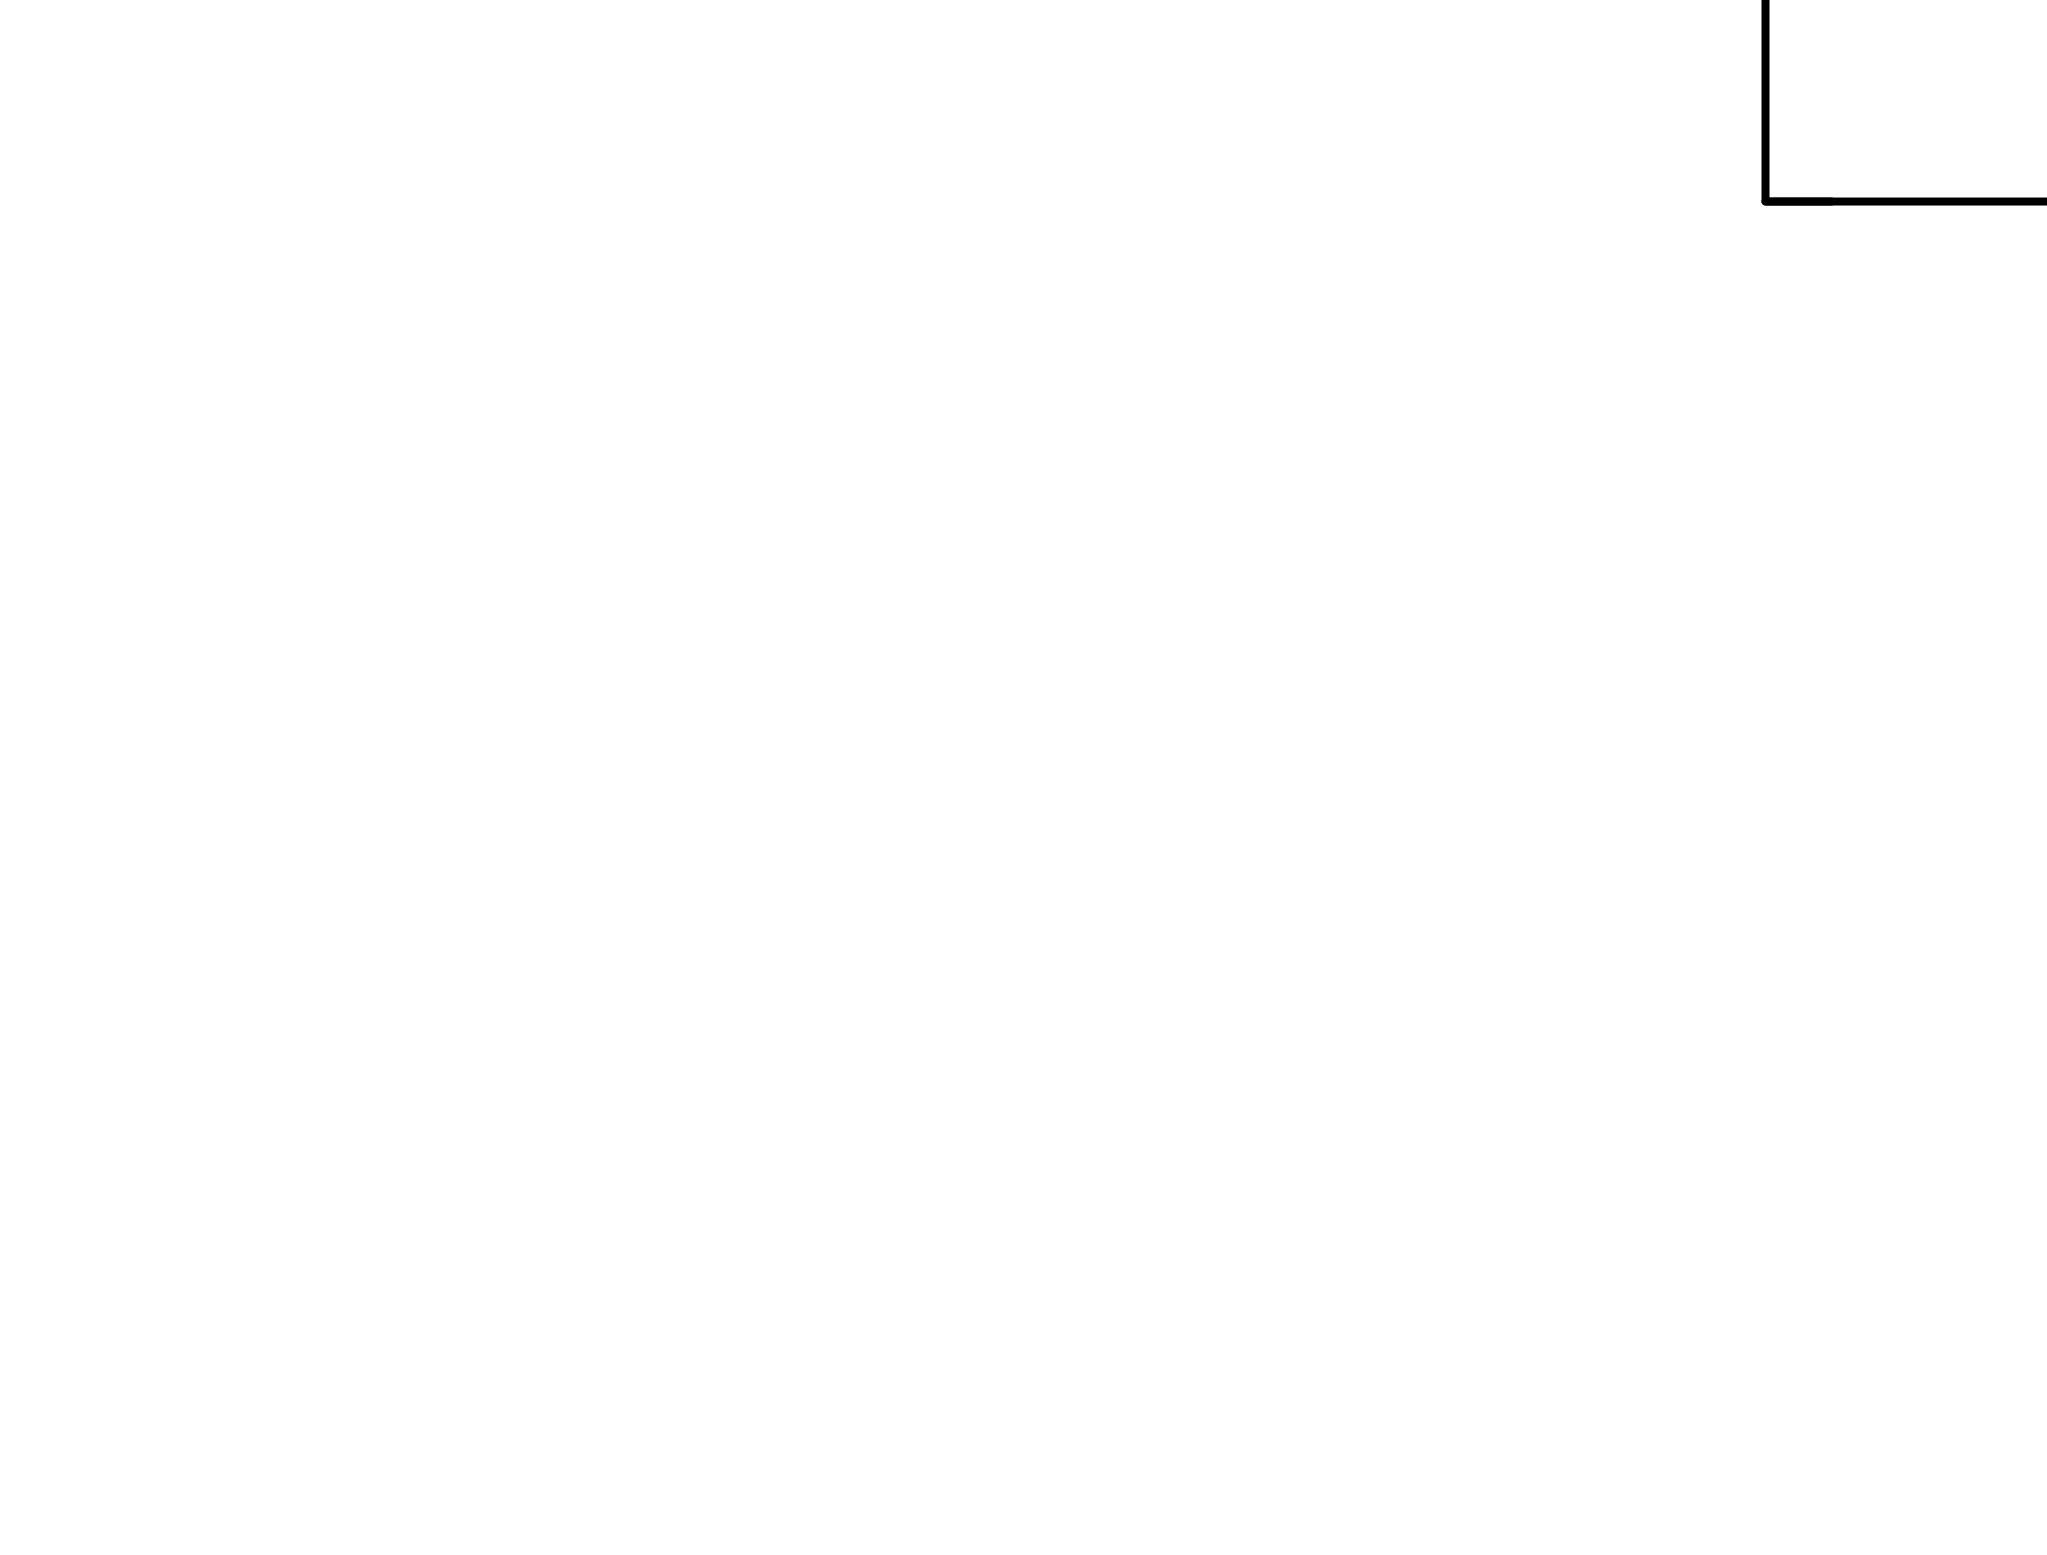

     2 channels (1-2) ignored in spectrum #     1
     1 channels (7) ignored in spectrum #     1



In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.19 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.937460e+11     using 4 bins.

Tes

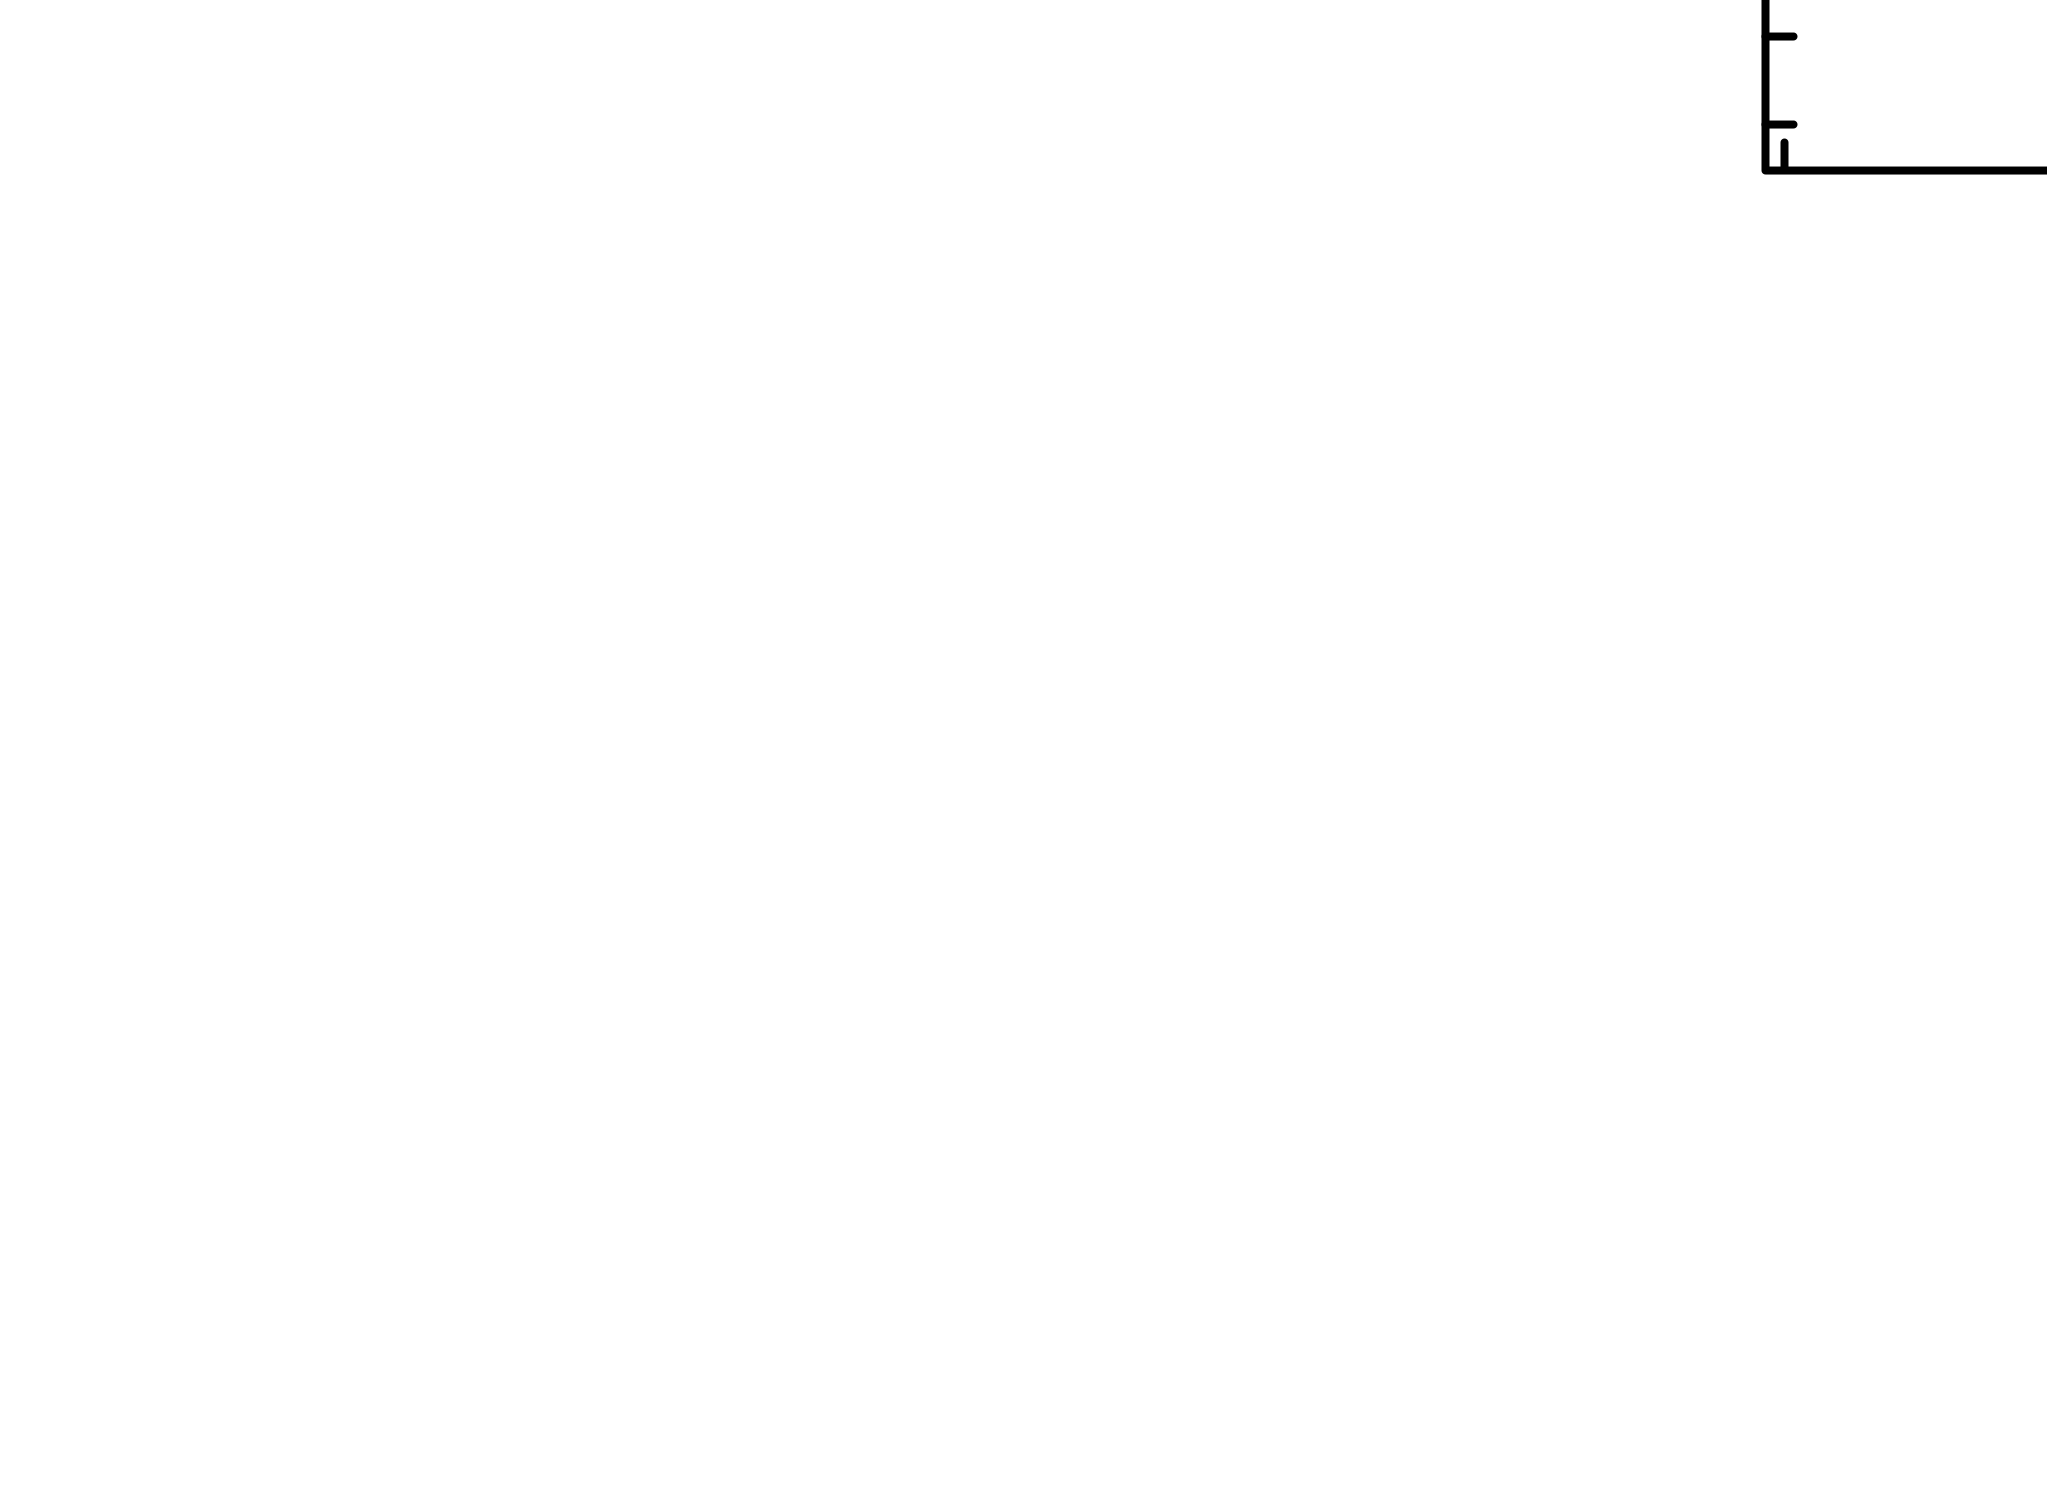

In [4]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.194184e+11     using 4 bins.

Test statistic : Chi-Squared              2.194184e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.12035      1.40319      -2      0.495436       1.45454   1.08837e-05
1.06295      65894.1      -3      0.735863       1.95166   1.78891e-05
0.6665       51295.2      -4      0.762363       1.95286   2.08224e-05
0

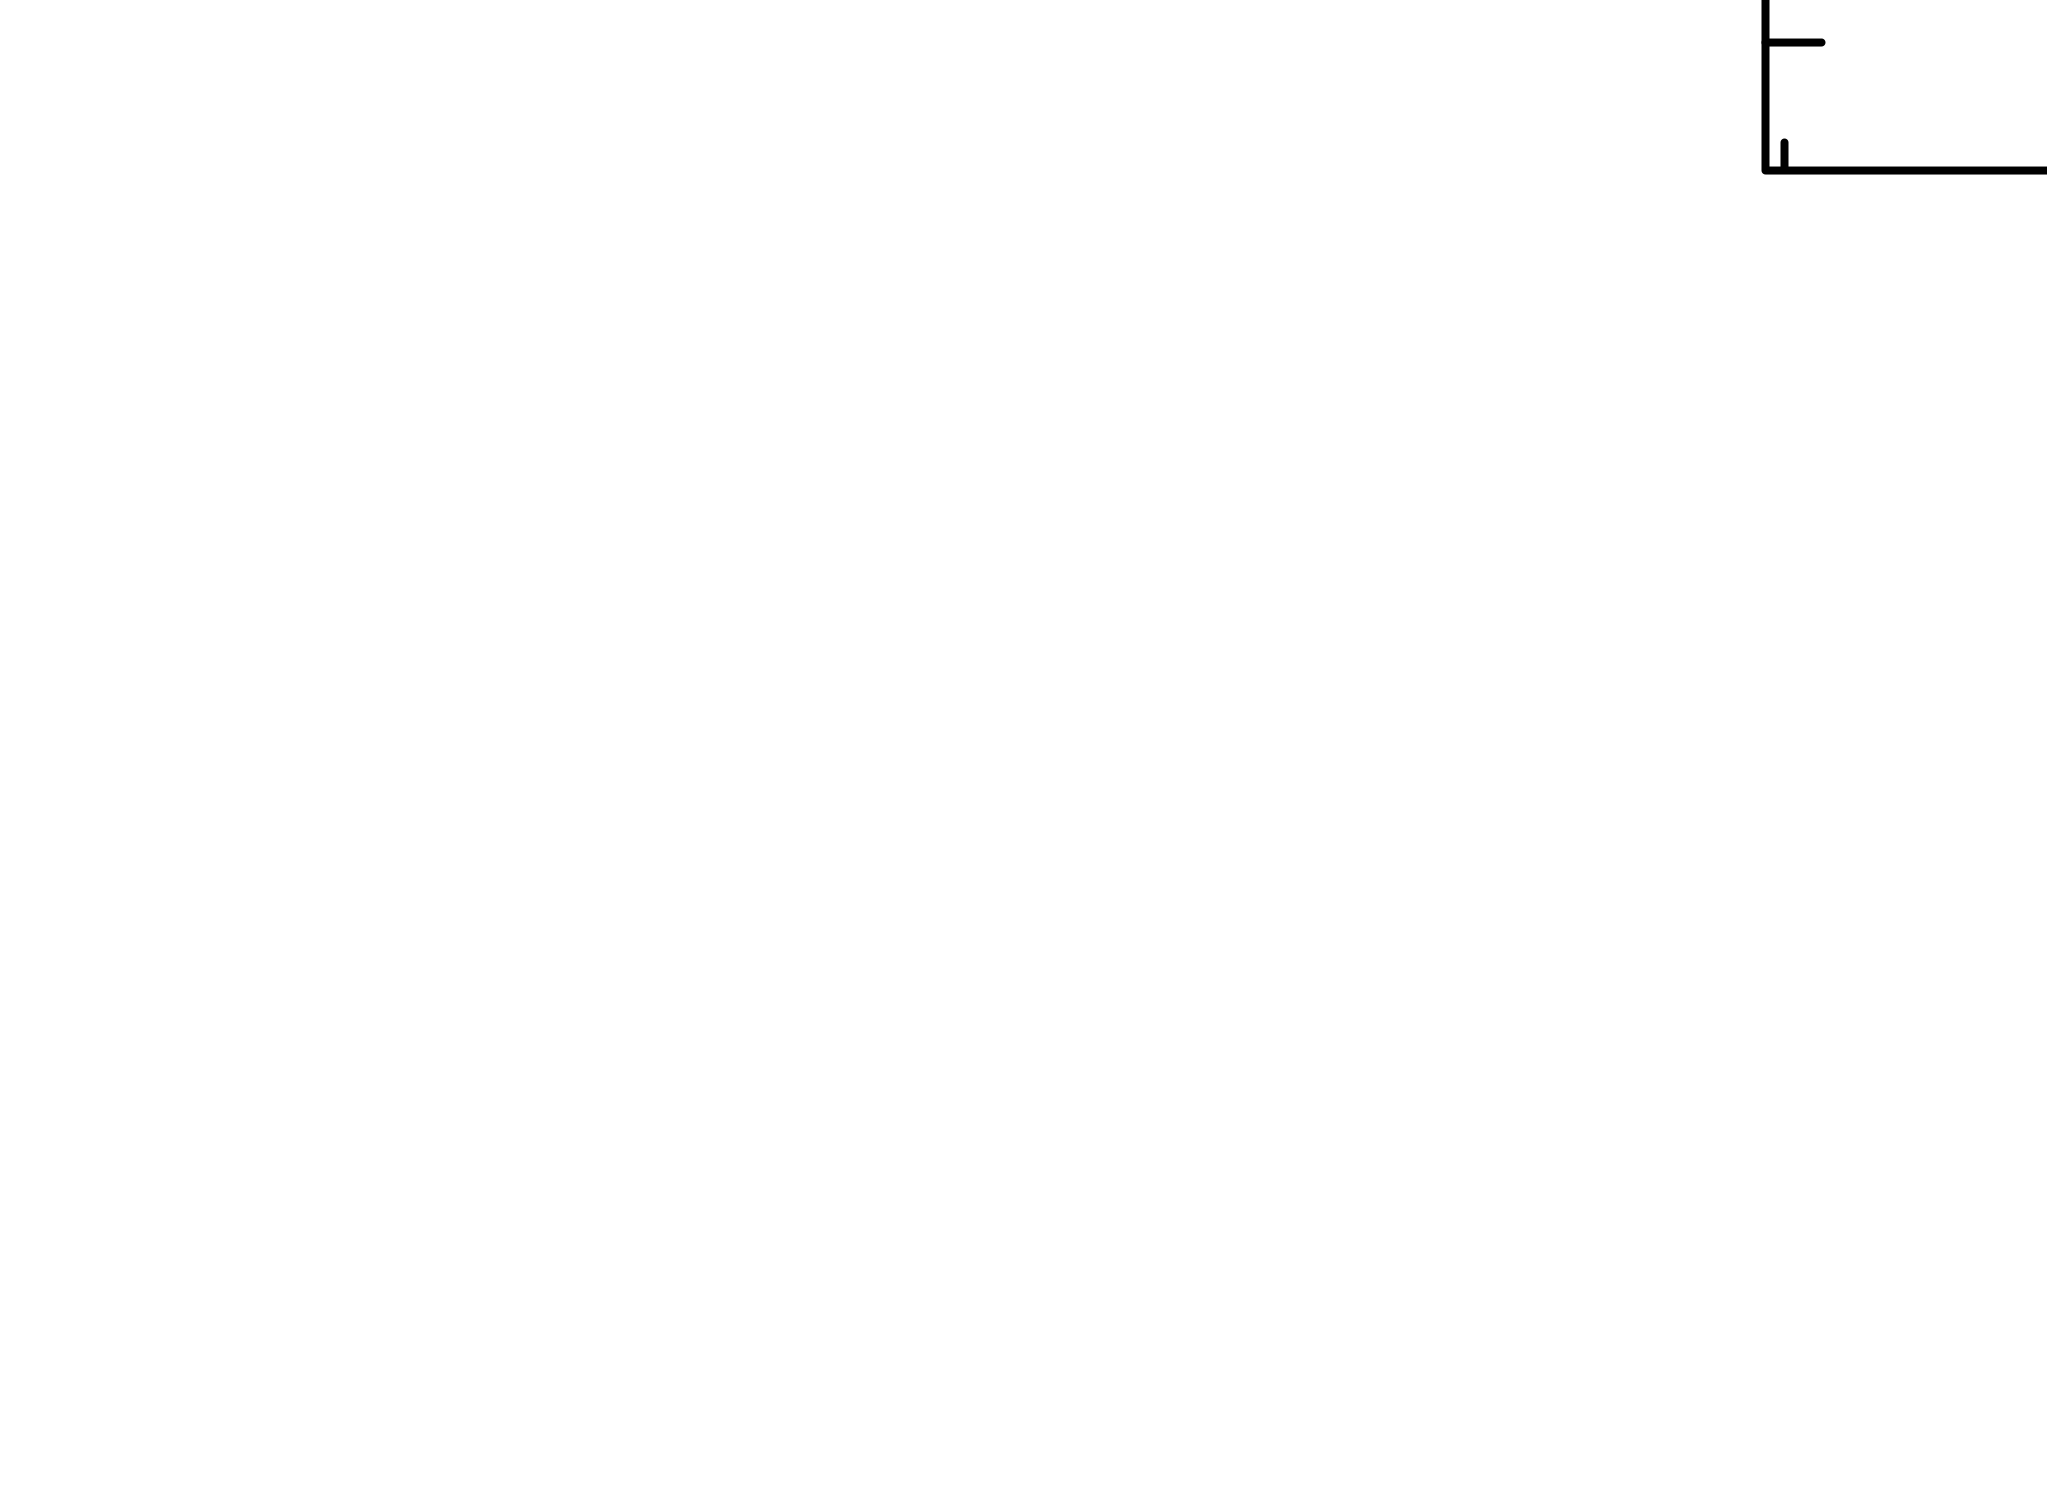

In [5]:
AllModels.clear()
mo1 = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

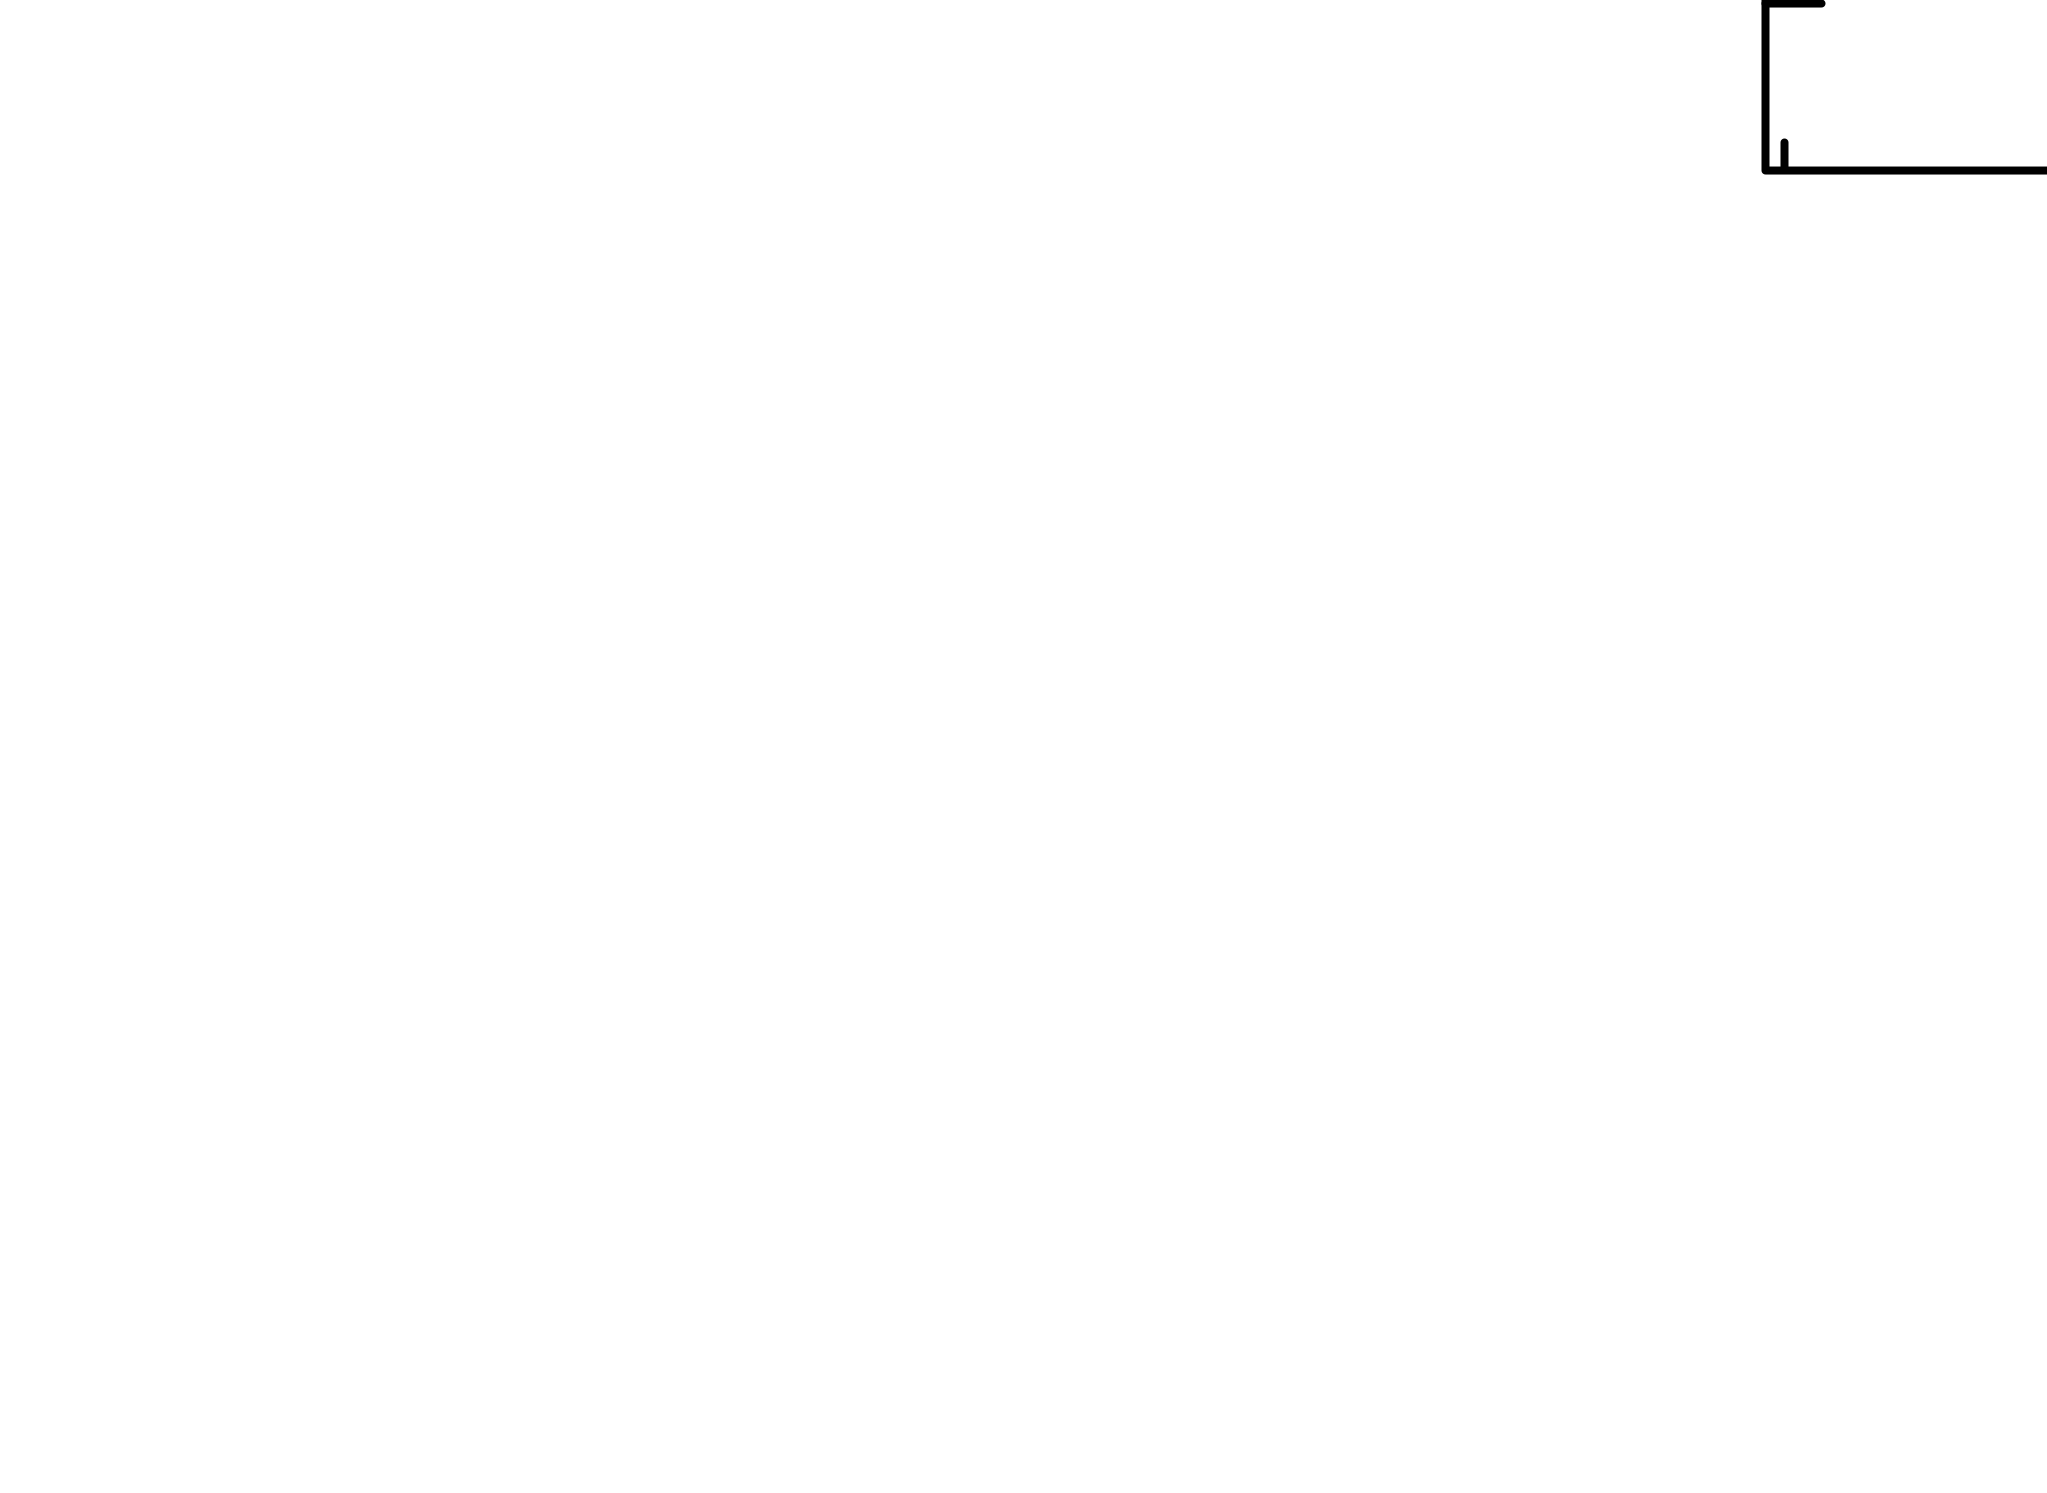


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.482358e+10     using 4 bins.

Test statistic : Chi-Squared              4.482358e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.05633      0.821407      0      0.860238       3.81953   2.30700e-05
0.593383     31201.1      -1      0.718322       3.60347   2.37972e-05
0.590239     2122.94      -2      0.701384       3.77445   2.29462e-05
 Va

In [6]:
AllModels.clear()
mo1 = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.188378e+10     using 4 bins.

Test statistic : Chi-Squared              1.188378e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1.9685       3.49338      -3       1.34796       1.47434   6.4

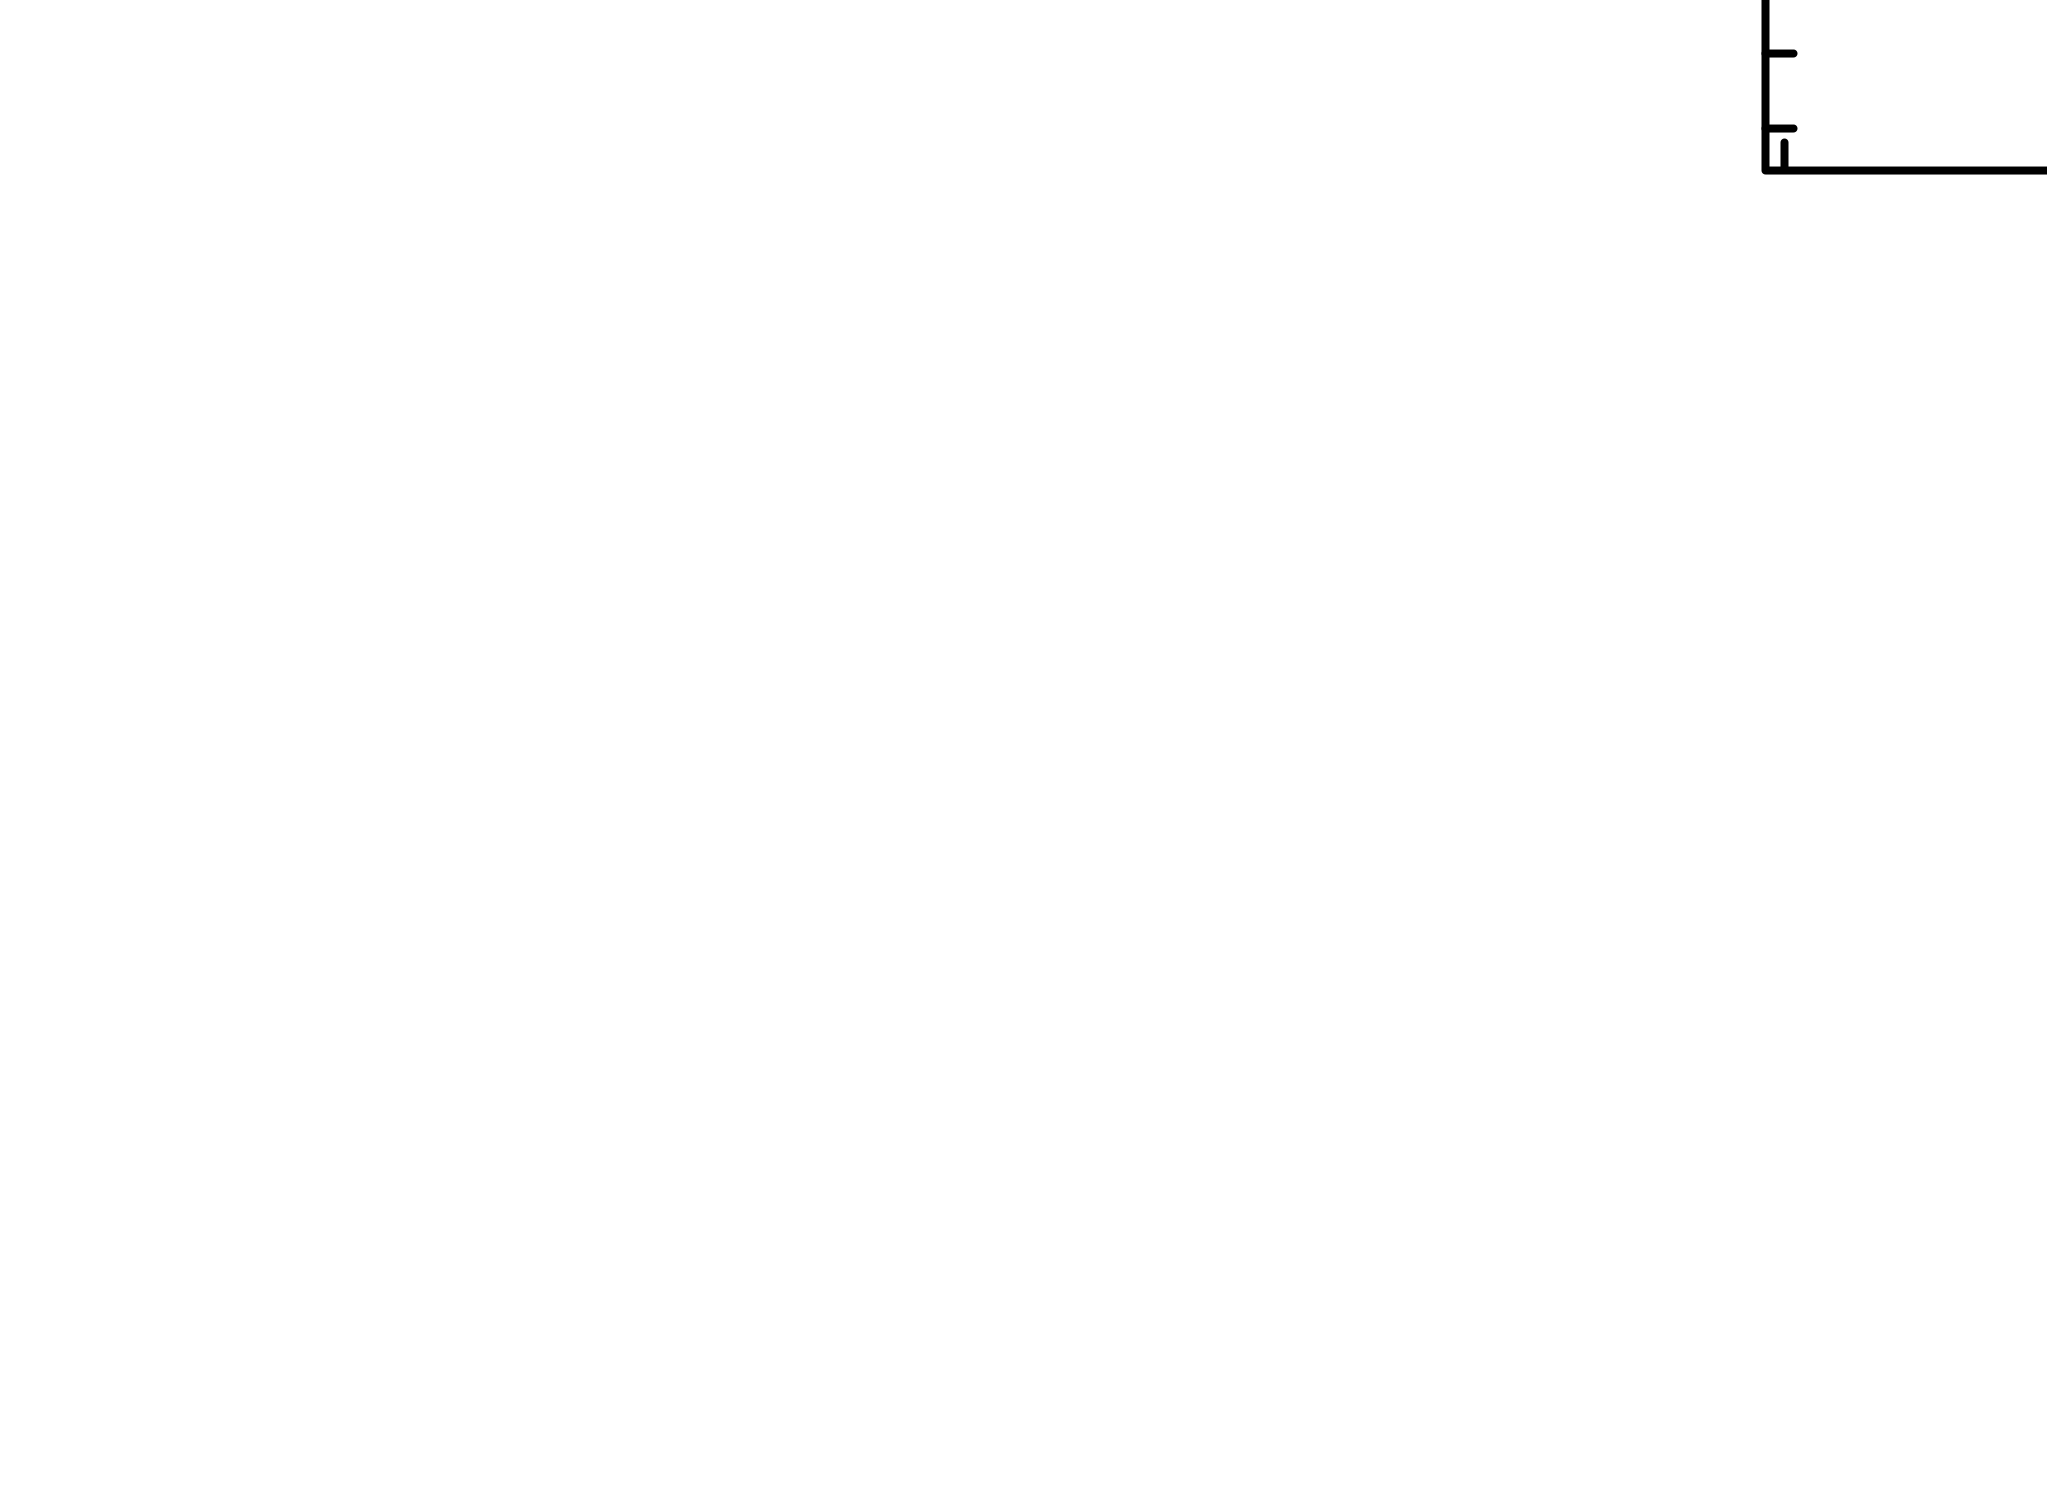

In [7]:
AllModels.clear()
mo1 = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux("0.2 12.0")

 Model Flux 1.0987e-05 photons (4.4595e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 0.1666
d_kpc = 1/plx
F_x = 4.4595*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.9218418970567344e+32


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*16.38)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  2.9457053198493023e-12
F_x / F_opt:  0.015138988852517472
